# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [1]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


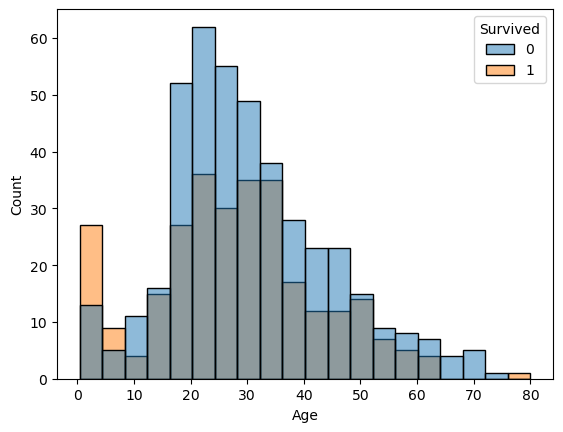

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

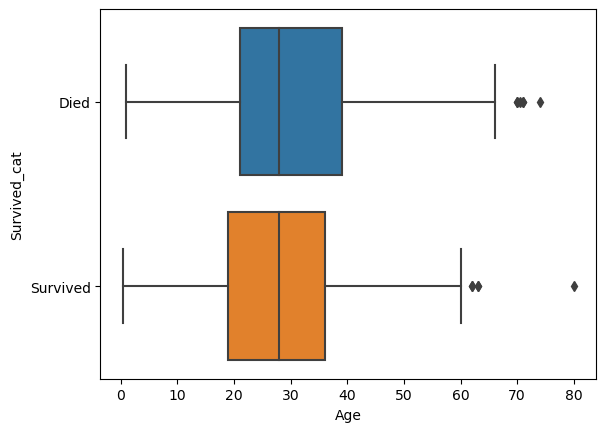

In [6]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [5]:
df['Survived'].dtype

dtype('int64')

C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


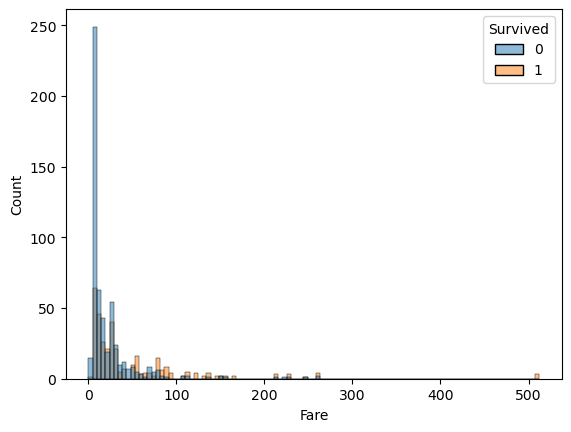

In [7]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

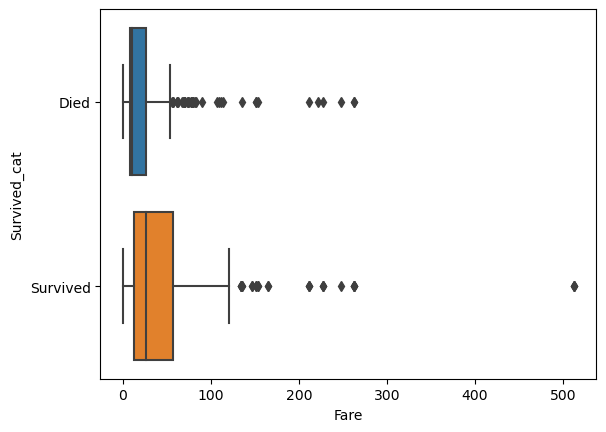

In [8]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load dataset
df = pd.read_csv("titanic_passengers.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Survived_cat'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

df['FamilyCount'] = df['SibSp'] + df['Parch']

age_bins = [0, 12, 18, 35, 50, np.inf]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

fare_bins = [0, 20, 50, 100, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Luxury']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat,FamilyCount,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,1,Young Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,1,Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,0,Young Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,1,Adult,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,0,Adult,Low


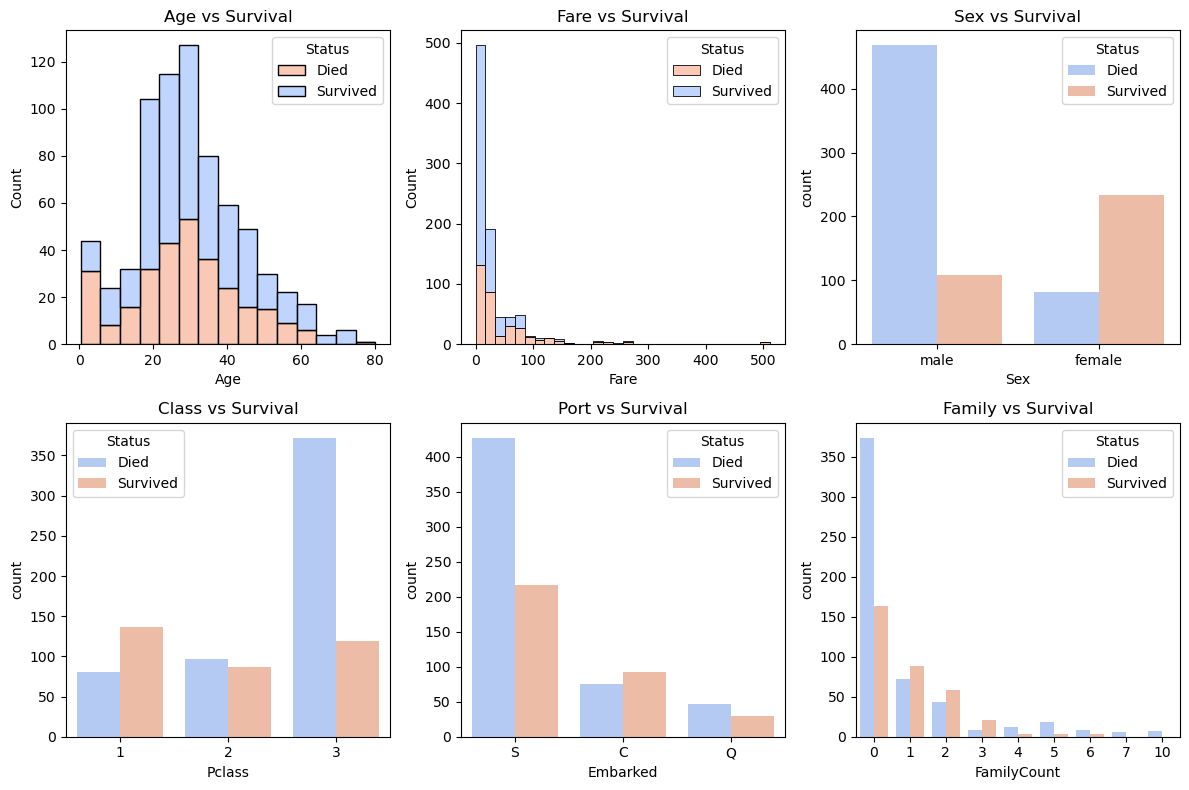

In [9]:
plt.figure(figsize=(12,8))

# Age vs Survival
plt.subplot(2,3,1)
sns.histplot(x='Age', data=df, hue='Survived', multiple='stack', bins=15, palette='coolwarm')
plt.title("Age vs Survival")
plt.legend(title='Status', labels=['Died', 'Survived'])

# Fare vs Survival
plt.subplot(2,3,2)
sns.histplot(x='Fare', data=df, hue='Survived', multiple='stack', bins=30, palette='coolwarm')
plt.title("Fare vs Survival")
plt.legend(title='Status', labels=['Died', 'Survived'])

# Sex vs Survival
plt.subplot(2,3,3)
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title("Sex vs Survival")
plt.legend(title='Status', labels=['Died', 'Survived'])

# Class vs Survival
plt.subplot(2,3,4)
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title("Class vs Survival")
plt.legend(title='Status', labels=['Died', 'Survived'])

# Port vs Survival
plt.subplot(2,3,5)
sns.countplot(x='Embarked', hue='Survived', data=df, palette='coolwarm')
plt.title("Port vs Survival")
plt.legend(title='Status', labels=['Died', 'Survived'])

# Family vs Survival
plt.subplot(2,3,6)
sns.countplot(x='FamilyCount', hue='Survived', data=df, palette='coolwarm')
plt.title("Family vs Survival")
plt.legend(title='Status', labels=['Died', 'Survived'])

plt.tight_layout()
plt.show()


# Key Takeaways
- Females had much higher survival rates than males.  
- First-class passengers and those who paid higher fares were far more likely to survive.  
- Children and younger adults had better odds of survival than older adults.  
- Passengers from Cherbourg (C) survived more often than those from Southampton (S).  
- Travelers with one or two family members survived more often than those alone or in large groups.


In [10]:
# Passengers most likely to survive
most = df.loc[
    (df['Sex'] == 'female') &
    (df['Pclass'] == 1) &
    (df['FareGroup'].isin(['High', 'Luxury'])) &
    (df['Embarked'] == 'C') &
    (df['Survived'] == 1)
]

# Passengers least likely to survive
least = df.loc[
    (df['Sex'] == 'male') &
    (df['Pclass'] == 3) &
    (df['FareGroup'] == 'Low') &
    (df['Embarked'] == 'S') &
    (df['FamilyCount'] == 0) &
    (df['Survived'] == 0)
]

print("Most likely to survive example:", most['Name'].iloc[0] if not most.empty else "None found")
print("Least likely to survive example:", least['Name'].iloc[0] if not least.empty else "None found")


Most likely to survive example: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Least likely to survive example: Allen, Mr. William Henry


# Real Passenger Facts and Summary

Most Likely to Survive
- Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
- Class: 1st Class
- Embarked: Cherbourg
- Outcome: Survived
- Interesting Fact: She was 38 years old and escaped on lifeboat 4 with other first-class women.

Least Likely to Survive
- Name: Allen, Mr. William Henry
- Class: 3rd Class
- Embarked: Southampton
- Outcome: Did not survive
- Interesting Fact: A suitcase belonging to Allen was recovered from the wreck in 2000. It contained clothing that bore a laundry stamp "W. Allen"

---

### Summary
Data from the Titanic passenger list shows that **wealth, gender, and class** were the strongest predictors of survival.
- Women and children in first class had the highest odds.
- Adult men in third class faced the lowest odds.
This aligns with historical accounts of evacuation priorities and ship layout.
